In [1]:
import numpy as np
from tqdm import tqdm

def epsilon_greedy(K=10, TURNS=1000, RUNS=2000, EPSILON=0.1):

    # Initialize Q* of K bandits. 
    # e.g. Q_star[i, j] represents the real gain of j-th bandit in the i-th repetition
    Q_star = np.random.normal(0, 1, (RUNS, K))

    # Initialize estimated rewards Q_t.
    # e.g. Q_t[i, j] represents the estimated gain of the j-th bandit in the i-th repetition
    Q_t = np.zeros((RUNS, K))

    # the best bandit index of every run
    Q_optimal = np.argmax(Q_star, axis = 1)

    # The counter of a lever was pulled
    lever_count_t = np.zeros((RUNS, K))

    reward_t = np.zeros((RUNS, K))
    reward_count = []

    for t in tqdm(range(TURNS)):
        reward_recorder = []
        for run in range(RUNS):
            choosed_i = 0
            if np.random.random() < EPSILON:
                choosed_i = np.random.randint(K)
            else:
                choosed_i = np.argmax(Q_t[run])
            # 
            lever_count_t[run, choosed_i] += 1

            reward_t = np.random.normal(Q_star[run, choosed_i], 1)
            reward_recorder.append(reward_t)

            Q_t[run, choosed_i] = (lever_count_t[run, choosed_i] * Q_t[run, choosed_i] + reward_t) / lever_count_t[run, choosed_i]
            
        reward_count.append(np.mean(reward_recorder))
    return reward_count

100%|██████████| 1000/1000 [00:38<00:00, 25.87it/s]


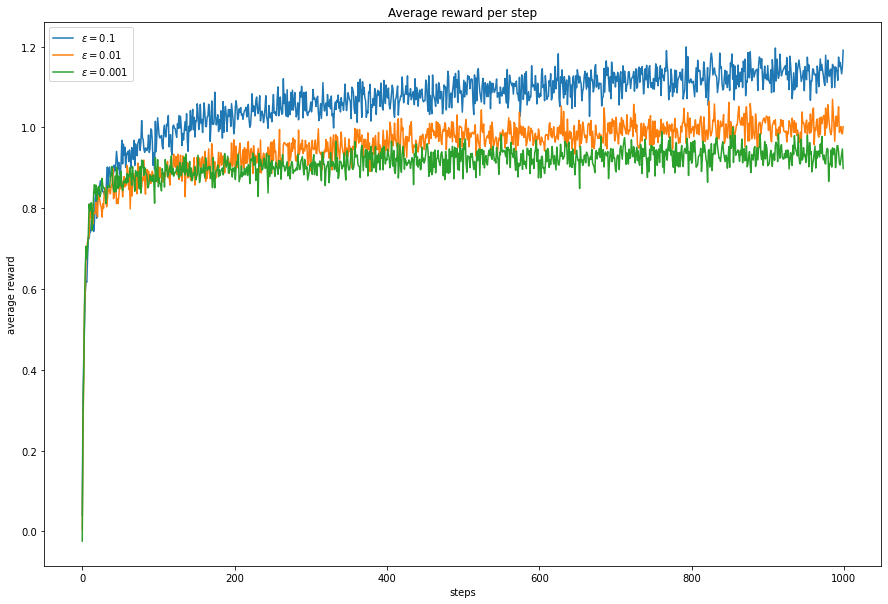

In [2]:
reward_01 = epsilon_greedy(EPSILON=0.1)
reward_001 = epsilon_greedy(EPSILON=0.01)
reward_0001 = epsilon_greedy(EPSILON=0.001)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(reward_01, label="$\epsilon = 0.1$")
ax.plot(reward_001, label="$\epsilon = 0.01$")
ax.plot(reward_0001, label="$\epsilon = 0.001$")
plt.xlabel("steps")
plt.ylabel("average reward")
plt.title("Average reward per step")
plt.legend()
plt.show()

100%|██████████| 10000/10000 [05:02<00:00, 33.10it/s]


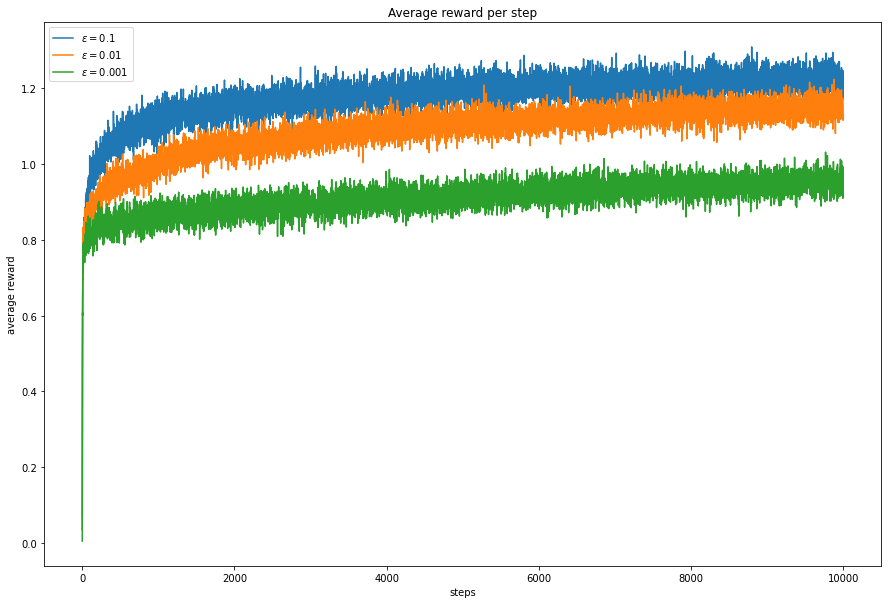

In [3]:
reward_01 = epsilon_greedy(EPSILON=0.1, TURNS=10000)
reward_001 = epsilon_greedy(EPSILON=0.01, TURNS=10000)
reward_0001 = epsilon_greedy(EPSILON=0.001, TURNS=10000)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(reward_01, label="$\epsilon = 0.1$")
ax.plot(reward_001, label="$\epsilon = 0.01$")
ax.plot(reward_0001, label="$\epsilon = 0.001$")
plt.xlabel("steps")
plt.ylabel("average reward")
plt.title("Average reward per step")
plt.legend()
plt.show()